In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from implementations import *
from sklearn import naive_bayes as nb
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

#to access our implemented ML functions
%load_ext autoreload
%autoreload 2

In [2]:
data_path = data_file(20.0)

In [14]:
data = clean_df(build_df(data_path))
data['name_s'].replace(['e-', 'gamma'], [1, 2], inplace=True)

In [15]:
data.head()

,index,X(mm),Y(mm),Z(mm),DX,DY,DZ,KinE(MeV),dE(MeV),StepLeng,X(mm)_s,Y(mm)_s,Z(mm)_s,DX_s,DY_s,DZ_s,Kin(MeV)_s,name_s
0,0,0.00,100.0,100.0,1.000,0.000,0.00000,20.0,0.000,0.00,0.00,0.0,0.0,0.000,0.000,0.0000,0.000,0
1,1,4.12,99.8,100.0,0.987,-0.160,-0.01220,18.4,0.563,4.12,4.12,99.8,100.0,0.802,0.592,0.0804,1.070,1
2,2,8.26,99.1,100.0,0.974,-0.227,-0.01810,17.6,0.621,4.22,8.26,99.1,100.0,0.506,0.811,-0.2930,0.119,1
3,3,12.90,98.2,100.0,0.983,-0.184,0.00546,16.8,0.779,4.78,0.00,0.0,0.0,0.000,0.000,0.0000,0.000,0
4,4,14.60,97.8,100.0,0.937,-0.331,0.10700,11.6,0.311,1.69,14.60,97.8,100.0,0.987,0.133,-0.0869,4.890,1


# Classification methods

## Understanding the repartition of the data 

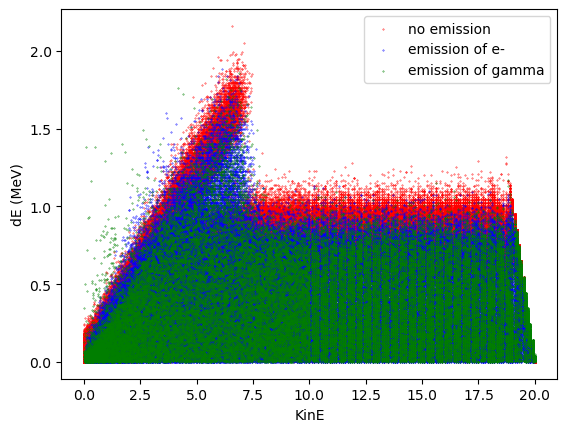

In [16]:
#We plot the energy range according to the type of emission to better understand how to classify them :
colors = ['r', 'b', 'g']
labels = ["no emission", "emission of e-", "emission of gamma"]

fig, ax = plt.subplots()

for i in range(3):
    
    df_to_plot = data[data['name_s']==i]    
    ax.scatter(df_to_plot['KinE(MeV)'], df_to_plot['dE(MeV)'], c = colors[i], s = 0.1, label = labels[i])

plt.xlabel('KinE')
plt.ylabel('dE (MeV)')
ax.legend()
plt.show()

## Testing some ML models to find a classification model that fits

In [45]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB

In [32]:
X_train, X_test, y_train, y_test = train_test_split(np.asarray(data['KinE(MeV)']).reshape(-1,1) , 
                                                    np.asarray(data['name_s']).reshape(-1,1), 
                                                    shuffle = True, 
                                                    test_size=0.1, 
                                                    random_state=0)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (648938, 1)
Shape of testing feature: (72105, 1)
Shape of training label: (648938, 1)
Shape of training label: (72105, 1)


## We try to train on several ML models : Decision Tree, Random Forest, Naive Bayes, K-Nearest Neighbours, Logistic Regression

Balanced Decision Tree :

In [24]:
# Building Decision Tree balanced model 
dtc_balanced = tree.DecisionTreeClassifier(random_state=0, max_depth = 3, class_weight = 'balanced' )
dtc_balanced.fit(X_train, y_train)

# Evaluate Model
dtc_balanced_eval = evaluate_model(dtc_balanced, X_test, y_test)

# Print result
print('Accuracy:', dtc_balanced_eval['acc'])
print('Confusion Matrix:\n', dtc_balanced_eval['cm'])
print("\n")
perc_dtc = get_percentage(dtc_balanced_eval['cm'], y_test)
print('Percentage of good no prediction :\n', perc_dtc['p0'])
print('Percentage of good e- prediction :\n', perc_dtc['p1'])
print('Percentage of good gamma prediction : \n', perc_dtc['p2'])

Accuracy: 0.46494695236114003
Confusion Matrix:
 [[28650     0 19575]
 [ 2969     0 15294]
 [  742     0  4875]]


Percentage of good no prediction :
 59.40902021772939
Percentage of good e- prediction :
 0.0
Percentage of good gamma prediction : 
 86.79010147765712


Balanced Random Forest : 

In [28]:
# Building Random Forest model 
rf = RandomForestClassifier(random_state=0, max_depth = 3, class_weight = 'balanced')
rf.fit(X_train, y_train)

# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Confusion Matrix:\n', rf_eval['cm'])
print("\n")
perc_fr = get_percentage(rf_eval['cm'], y_test)
print('Percentage of good no prediction :\n', perc_fr['p0'])
print('Percentage of good e- prediction :\n', perc_fr['p1'])
print('Percentage of good gamma prediction : \n', perc_fr['p2'])

/var/folders/yl/4_xhz_y92px_c574xx1xql680000gn/T/ipykernel_56969/2710483387.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Accuracy: 0.4649608210248943
Confusion Matrix:
 [[28627    67 19531]
 [ 2959    36 15268]
 [  739    15  4863]]


Percentage of good no prediction :
 59.36132711249352
Percentage of good e- prediction :
 0.19711985982587746
Percentage of good gamma prediction : 
 86.57646430478904


K-Nearest Neighbours

In [42]:
# Building KNN model 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Confusion Matrix:\n', knn_eval['cm'])

perc = get_percentage(knn_eval['cm'], y_test)
print('Percentage of good no prediction :\n', perc['p0'])
print('Percentage of good e- prediction :\n', perc['p1'])
print('Percentage of good gamma prediction : \n', perc['p2'])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.6445738853061508
Confusion Matrix:
 [[40540  7150   535]
 [12095  5803   365]
 [ 3608  1875   134]]
Percentage of good no prediction :
 84.06428201140488
Percentage of good e- prediction :
 31.774626293599077
Percentage of good gamma prediction : 
 2.3856150970268826


balanced logistic regression : 

In [47]:
reg_balanced = LogisticRegression(multi_class='ovr', penalty = 'none', class_weight = 'balanced' )
reg_balanced.fit(X_train, y_train)

# Evaluate Model
log_balanced = evaluate_model(reg_balanced, X_test, y_test)

# Print result
print('Accuracy:', log_balanced['acc'])
print('Confusion Matrix:\n', log_balanced['cm'])

perc_log = get_percentage(log_balanced['cm'], y_test)
print('Percentage of good no prediction :\n', perc_log['p0'])
print('Percentage of good e- prediction :\n', perc_log['p1'])
print('Percentage of good gamma prediction : \n', perc_log['p2'])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.5862422855557867
Confusion Matrix:
 [[31683 16542     0]
 [ 7675 10588     0]
 [ 2128  3489     0]]
Percentage of good no prediction :
 65.69828926905133
Percentage of good e- prediction :
 57.97514099545529
Percentage of good gamma prediction : 
 0.0


Naive Bayes model : Gaussian

In [34]:
# Building Naive Bayes model 
nbgauss = GaussianNB()
nbgauss.fit(X_train, y_train)

# Evaluate Model
nb_eval = evaluate_model(nbgauss, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Confusion Matrix:\n', nb_eval['cm'])
print("\n")
perc_nb = get_percentage(nb_eval['cm'], y_test)
print('Percentage of good no prediction :\n', perc_nb['p0'])
print('Percentage of good e- prediction :\n', perc_nb['p1'])
print('Percentage of good gamma prediction : \n', perc_nb['p2'])

Accuracy: 0.668816309548575
Confusion Matrix:
 [[48225     0     0]
 [18263     0     0]
 [ 5617     0     0]]


Percentage of good no prediction :
 100.0
Percentage of good e- prediction :
 0.0
Percentage of good gamma prediction : 
 0.0


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Naive Bayes model categorical :

In [38]:
# Building Naive Bayes model 
nbcat = CategoricalNB()
nbcat.fit(X_train, y_train)

# Evaluate Model
nbcat_eval = evaluate_model(nbcat, X_test, y_test)

# Print result
print('Accuracy:', nbcat_eval['acc'])
print('Confusion Matrix:\n', nbcat_eval['cm'])

perc_nbcat = get_percentage(nbcat_eval['cm'], y_test)
print('Percentage of good no prediction :\n', perc_nbcat['p0'])
print('Percentage of good e- prediction :\n', perc_nbcat['p1'])
print('Percentage of good gamma prediction : \n', perc_nbcat['p2'])

Accuracy: 0.6749185216004437
Confusion Matrix:
 [[45841  2384     0]
 [15439  2824     0]
 [ 4765   852     0]]
Percentage of good no prediction :
 95.05650596163815
Percentage of good e- prediction :
 15.46295789300772
Percentage of good gamma prediction : 
 0.0


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Naive Bayes model Bernoulli :

In [40]:
# Building Naive Bayes model 
nb_bern = BernoulliNB(fit_prior = False)
nb_bern.fit(X_train, y_train)
#print((nb.predict_proba(X_test)>0.9).sum()/len(X_test))

# Evaluate Model
nb_eval_b = evaluate_model(nb_bern, X_test, y_test)

# Print result
print('Accuracy:', nb_eval_b['acc'])
print('Confusion Matrix:\n', nb_eval_b['cm'])

perc_b = get_percentage(nb_eval_b['cm'], y_test)
print('Percentage of good no prediction :\n', perc_b['p0'])
print('Percentage of good e- prediction :\n', perc_b['p1'])
print('Percentage of good gamma prediction : \n', perc_b['p2'])

Accuracy: 0.28203314610637265
Confusion Matrix:
 [[ 2073 46152     0]
 [    0 18263     0]
 [    0  5617     0]]
Percentage of good no prediction :
 4.298600311041991
Percentage of good e- prediction :
 100.0
Percentage of good gamma prediction : 
 0.0


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Model comparaison 

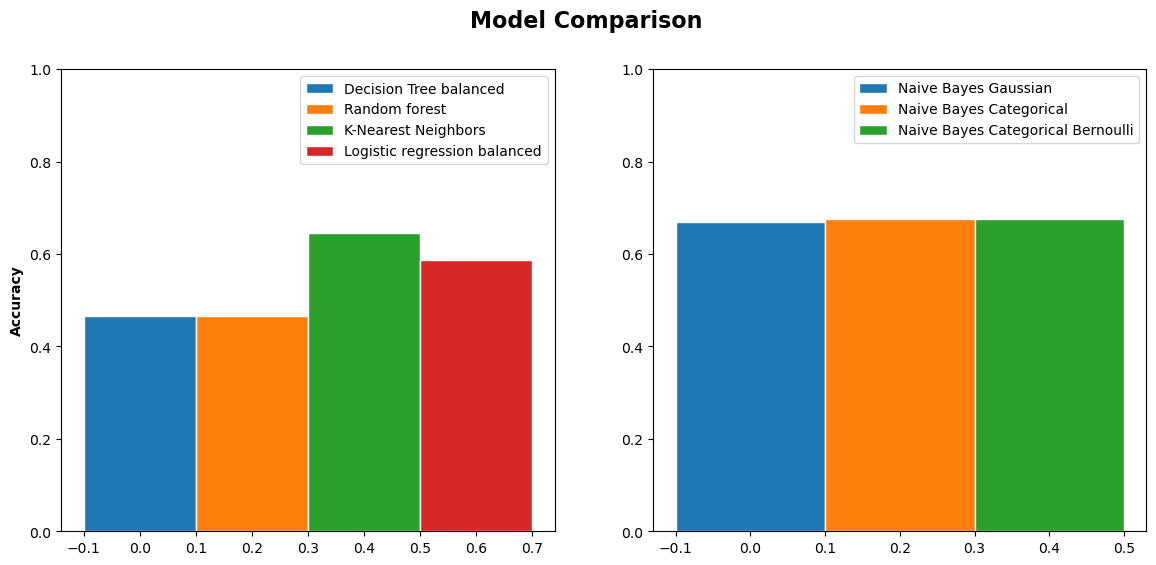

In [55]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(14)
fig.set_facecolor('white')

"""
gs = fig.add_gridspec(1, 4, hspace=0, wspace=0)
(ax1, ax2, ax3, ax4) = gs.subplots(sharex='col', sharey='row')
"""

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_balanced_eval['acc'] ]
rf_score = [rf_eval['acc']]
knn_score = [knn_eval['acc']]
log_balanced_score = [log_balanced['acc']]
nb_score = [nb_eval['acc']]
nb_cat_score = [nbcat_eval['acc'] ]
nb_b_score = [nb_eval_b['acc']]




## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]


## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree balanced')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random forest')
ax1.bar(r3, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r4, log_balanced_score, width=barWidth, edgecolor='white', label='Logistic regression balanced')

ax2.bar(r1, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes Gaussian')
ax2.bar(r2, nb_cat_score, width=barWidth, edgecolor='white', label='Naive Bayes Categorical')
ax2.bar(r3, nb_cat_score, width=barWidth, edgecolor='white', label='Naive Bayes Categorical Bernoulli')


ax1.sharey(ax2)

ax1.set_ylabel('Accuracy', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.legend()
ax2.legend()


plt.show()

We have better accuracy for the models that work with the prediction of class based on a probabily classification. This is one of the reason that led us to decide to not use a classification prediction but only to compute the probability of an event depending on its energy range. 
Such thing is done in the following steps :

# Plot of the probability repartition of our data

<AxesSubplot:xlabel='KinE(MeV)', ylabel='Density'>

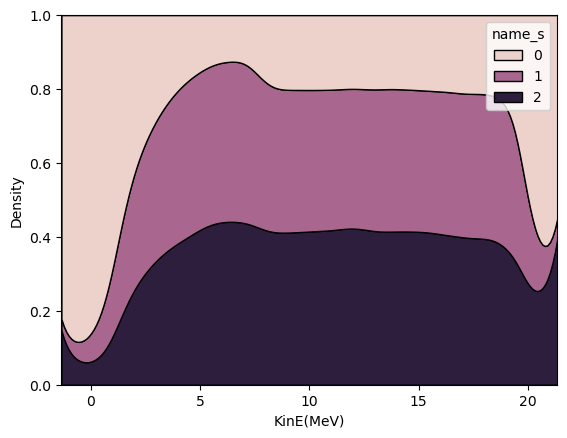

In [60]:
sns.kdeplot(data=data, x="KinE(MeV)", hue = "name_s", common_norm=False, multiple="fill", alpha = 1)

## Creation of the probability reference table 

In [61]:
table_of_p = proba_table(data, diff = 0.1)

/Users/clemence/Desktop/EPFL/Master/Machine Learning/Projet02/Projet02/implementations.py:166: RuntimeWarning: invalid value encountered in true_divide
  prob = n_range/np.sum(n_range)


In [62]:
table_of_p

,Energy_min,Energy_max,proba_0,proba_1,proba_2
0,0.0,0.1,0.994735,0.004423,0.000842
1,0.1,0.2,0.974427,0.019818,0.005755
2,0.2,0.3,0.960695,0.031893,0.007411
3,0.3,0.4,0.948833,0.041619,0.009548
4,0.4,0.5,0.935091,0.054127,0.010782
...,...,...,...,...,...
195,19.5,19.6,0.776230,0.220984,0.002786
196,19.6,19.7,NaN,NaN,NaN
197,19.7,19.8,0.722222,0.276667,0.001111
198,19.8,19.9,0.503480,0.494200,0.002320
